In [1]:
# To allow changes in .py files to be reflected in Notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import signal
from util.stream import Stream, DriftStream, transform_stream
from util.drift_generator import DriftGenerator

### Creating Stream with Increased Heart Rate

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


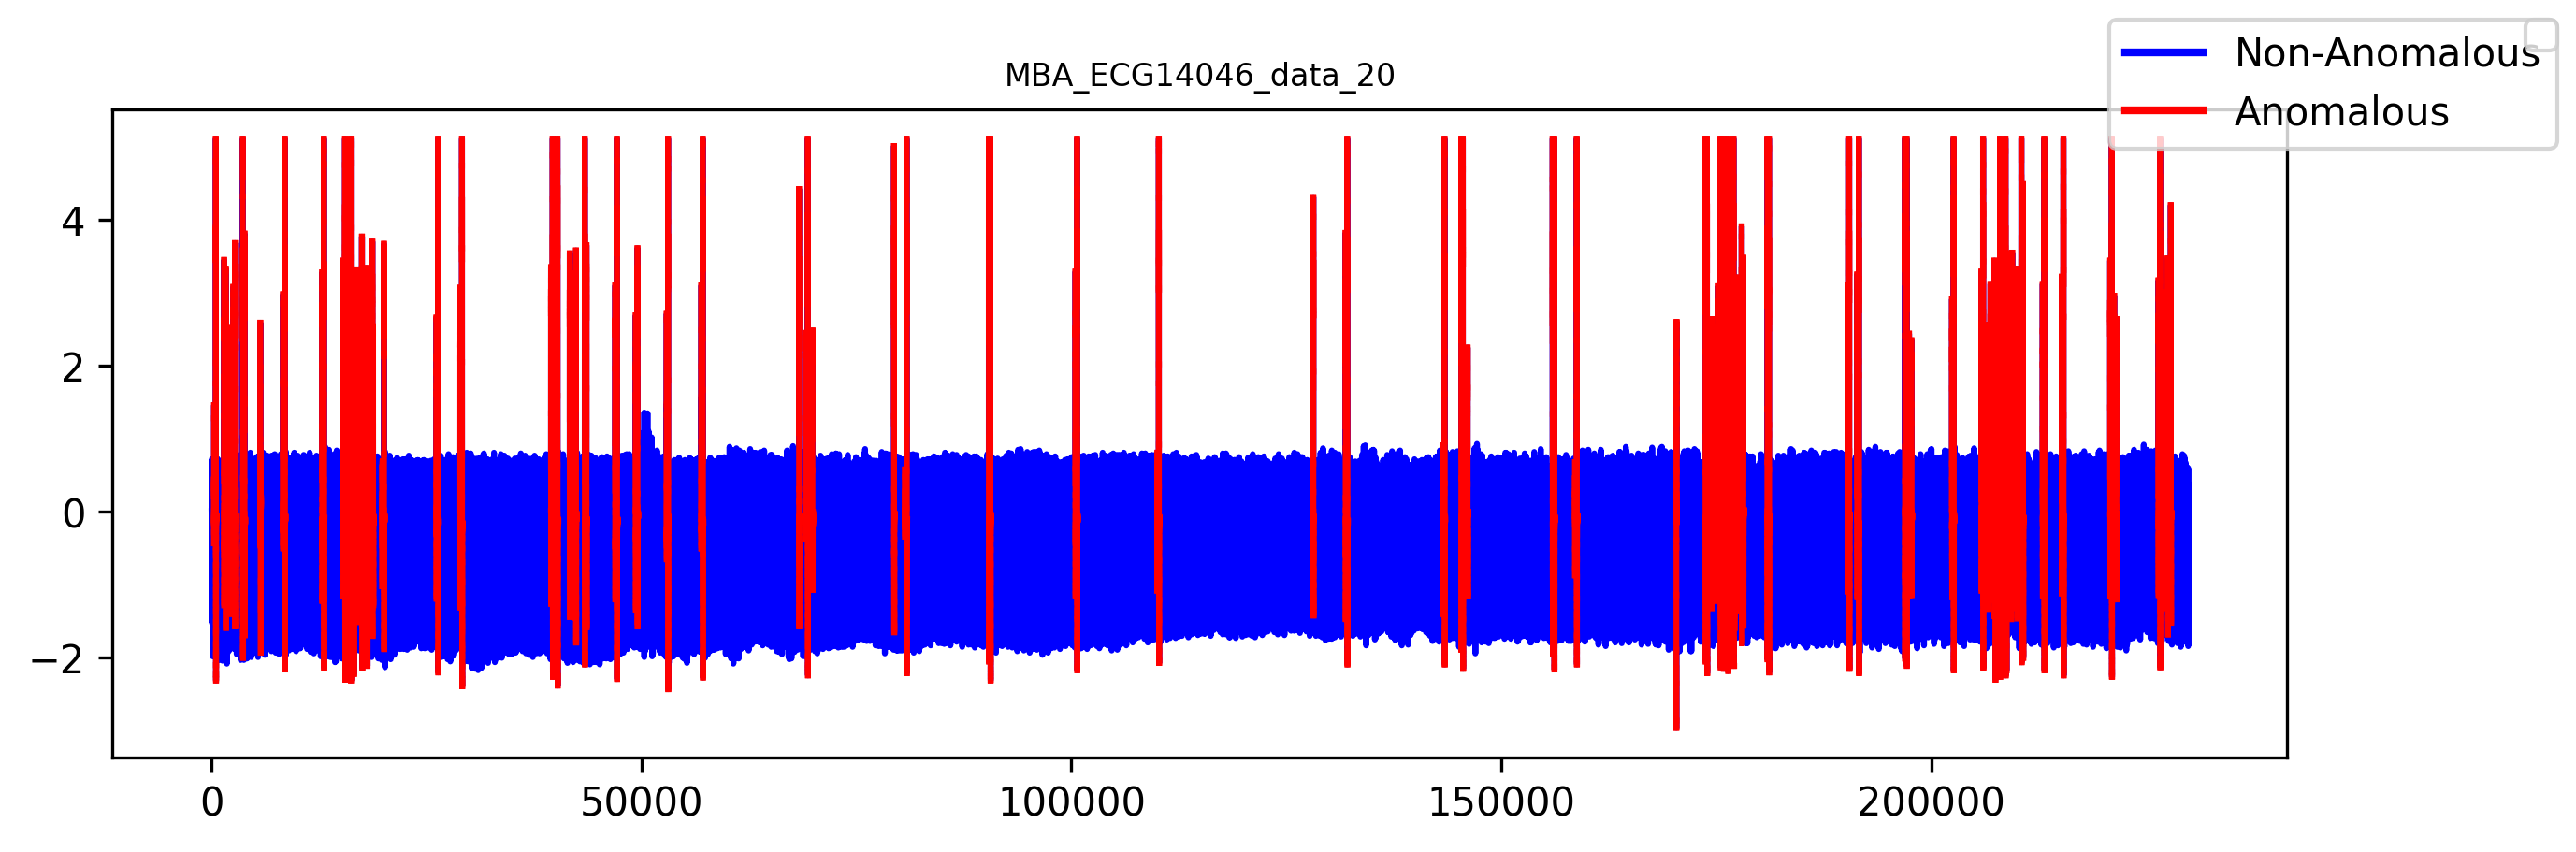

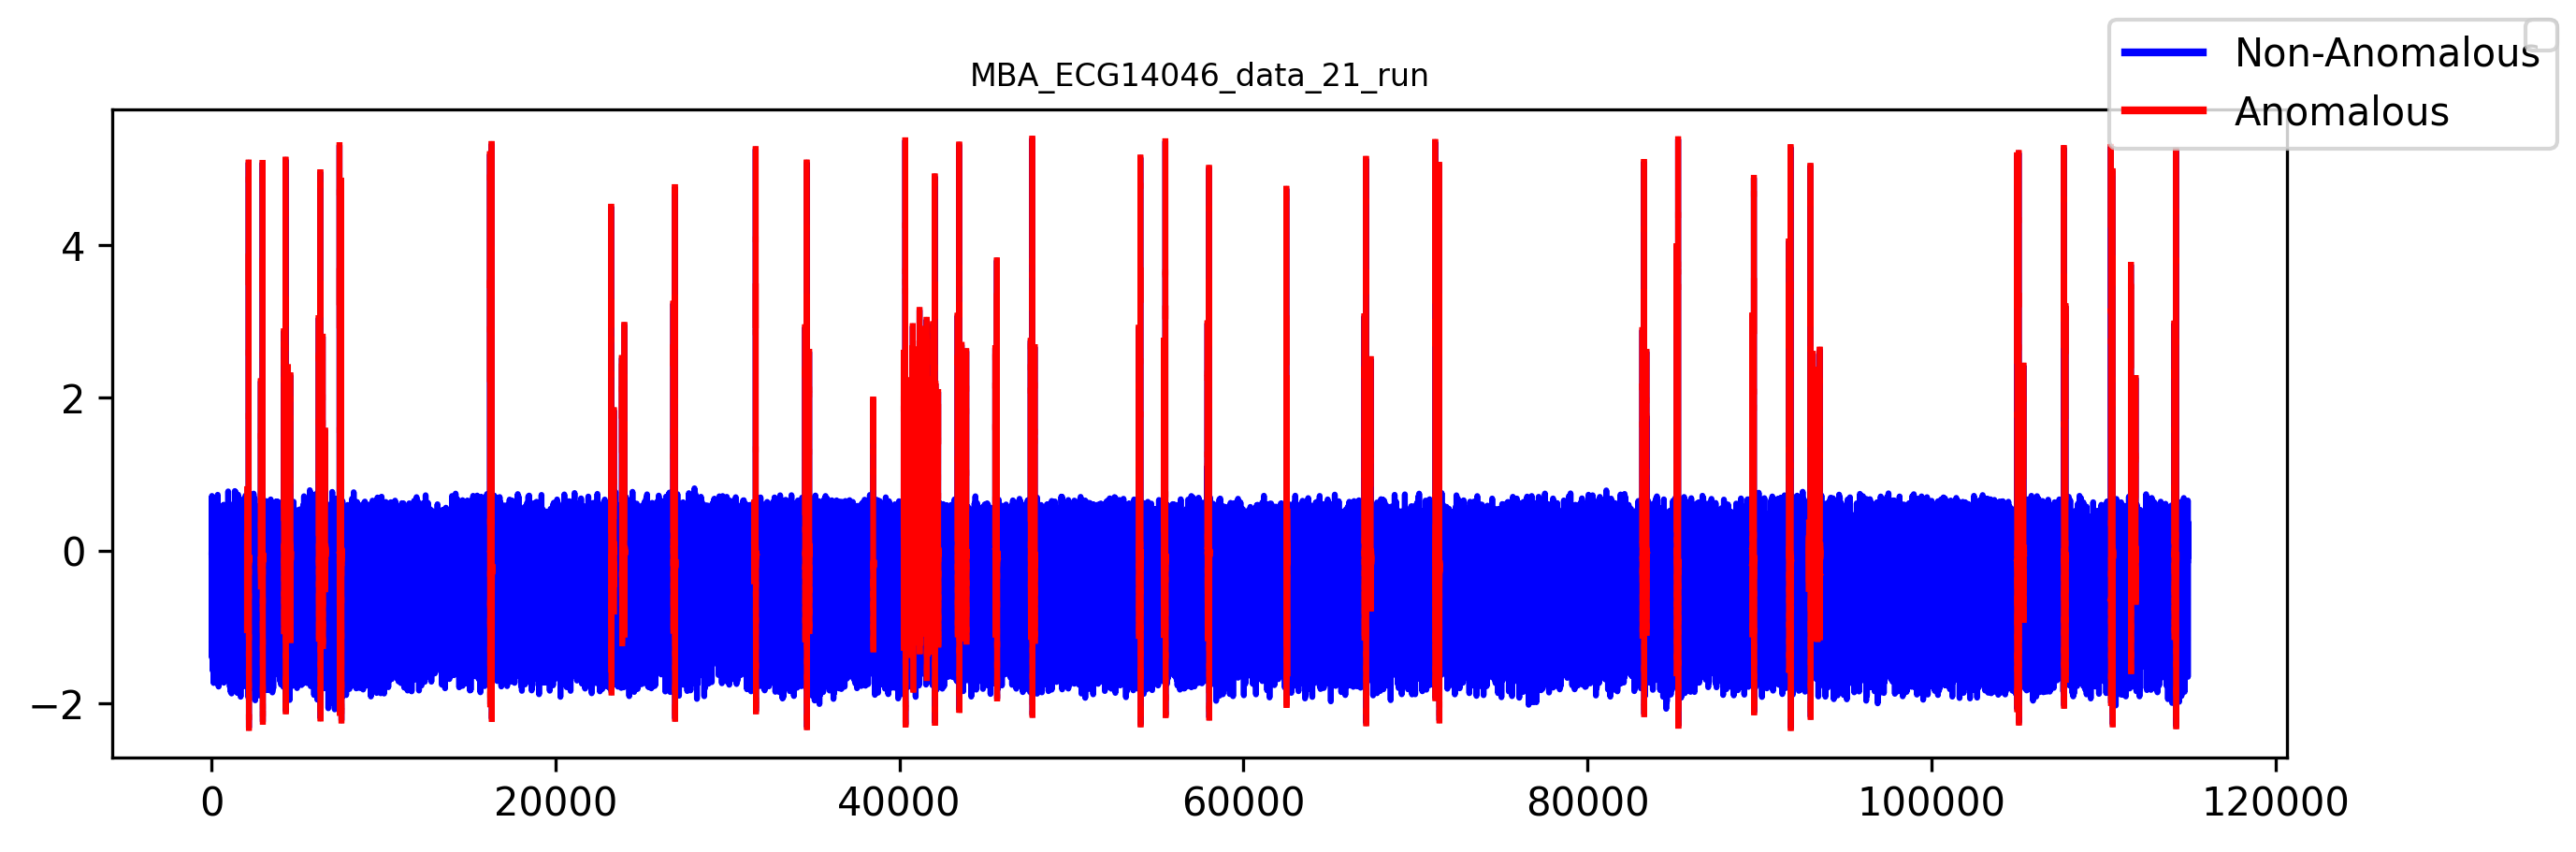

In [3]:
walk_ECG_filepath = '/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_20.arff'
run_ECG_filepath = '/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_21.arff'
walk_ECG = Stream(walk_ECG_filepath)
run_ECG_src = Stream(run_ECG_filepath)
run_ECG = transform_stream(run_ECG_src, 0, run_ECG_src.data.size-1, 0.5)
run_ECG.filename = f"{run_ECG.filename}_run"
walk_ECG.plot()
run_ECG.plot()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


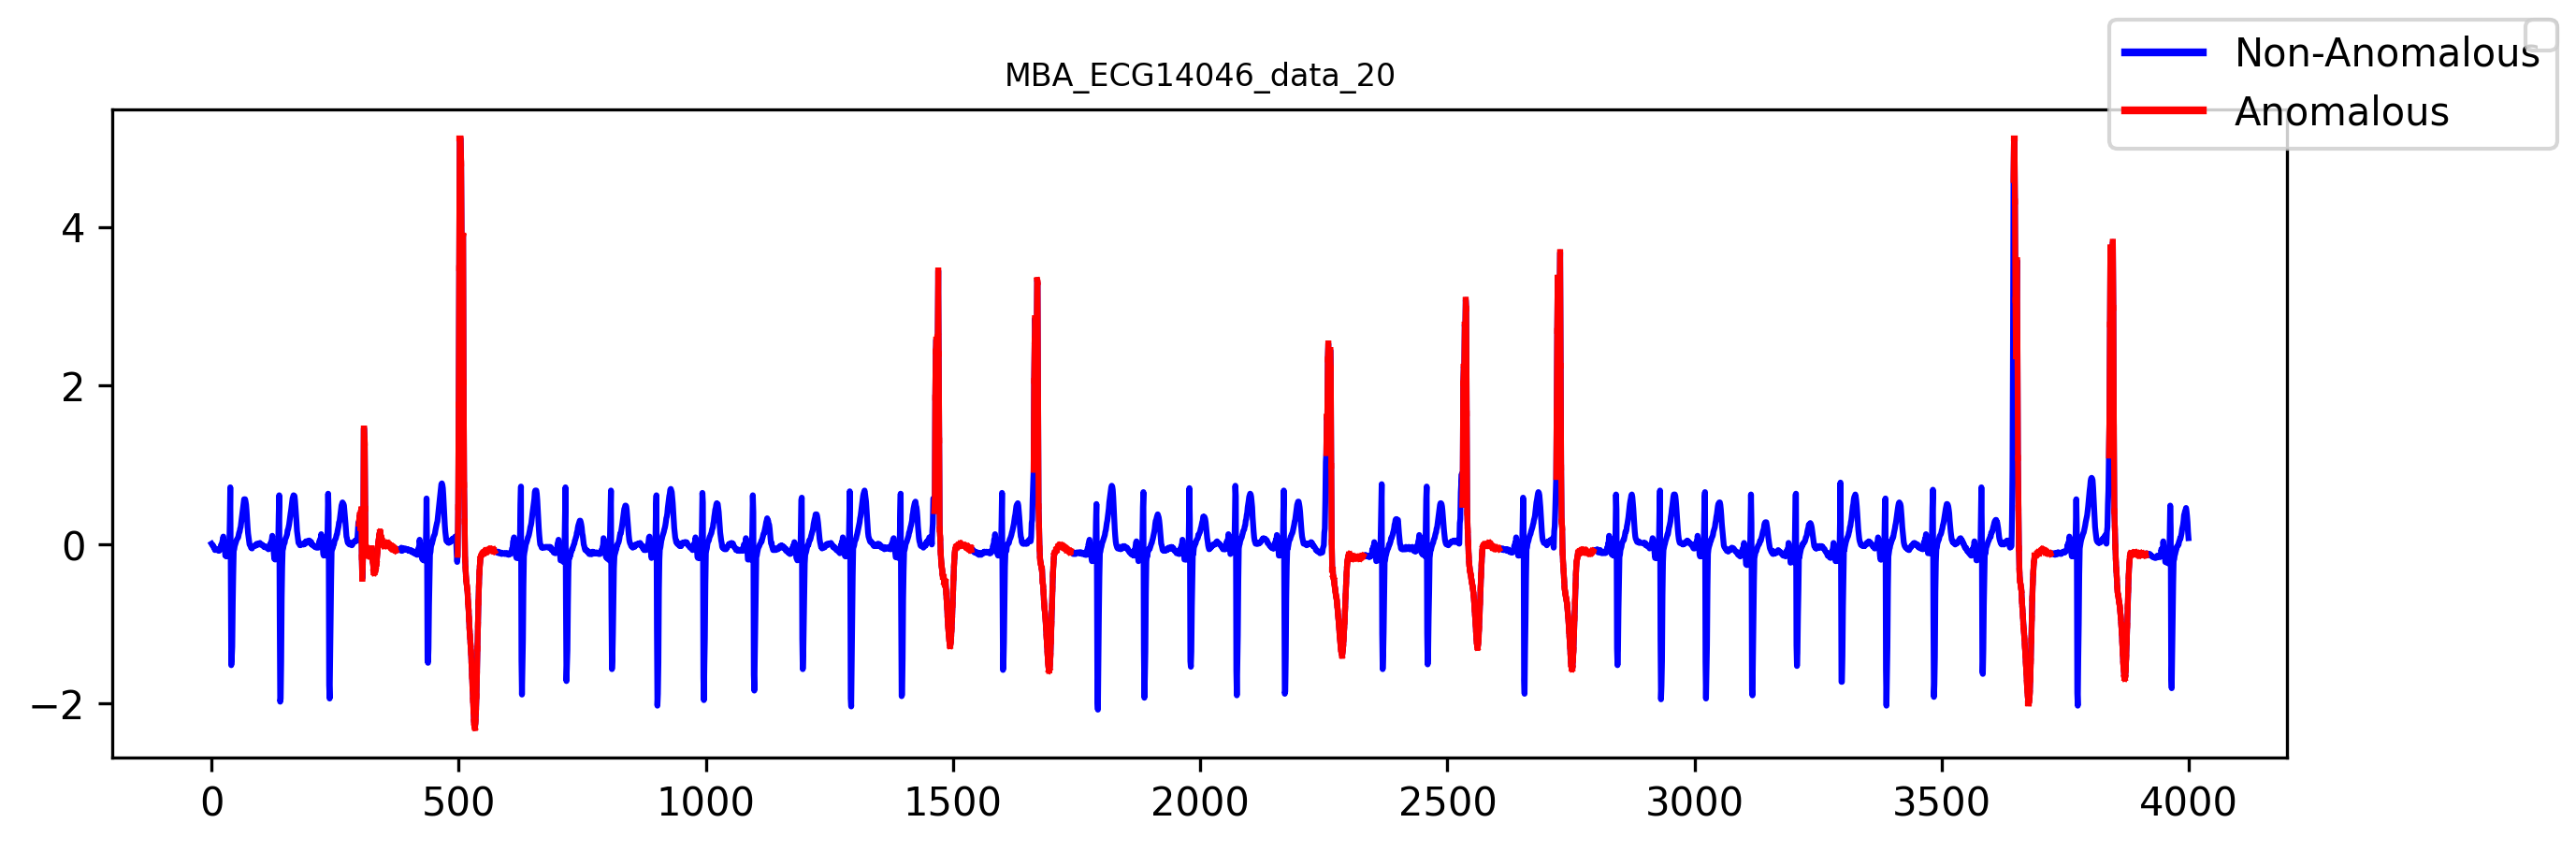

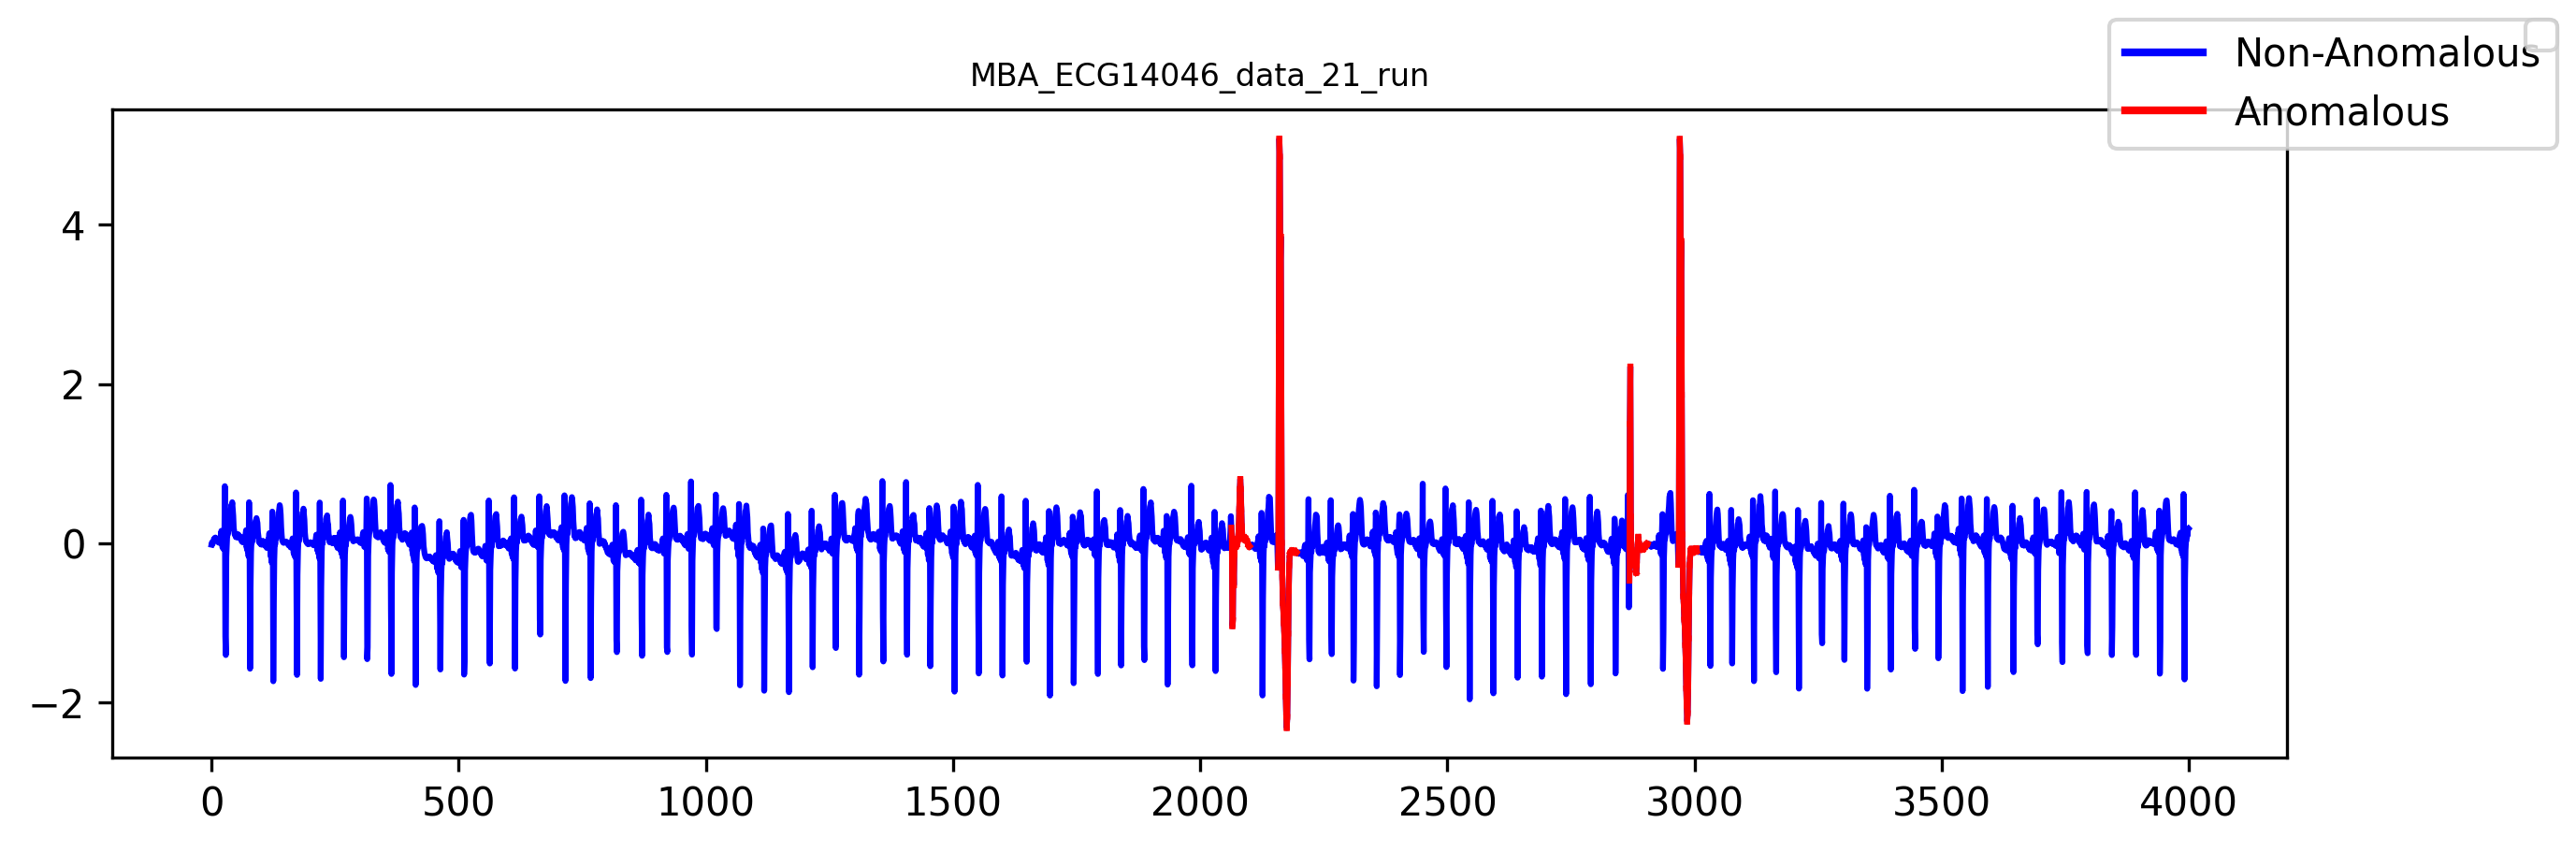

In [4]:
walk_ECG.plot(end=4000)
run_ECG.plot(end=4000)

In [5]:
source_dir = '/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG'
run_ECG.to_arff(source_dir)

'MBA_ECG14046_data_21_run.arff'

### Creating drift stream using above streams

In [6]:
drift_dir = '/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/synthetic'
moa_path = '/Users/akankshanehete/Desktop/moa-release-2023.04.0/lib'
source_streams = [walk_ECG, run_ECG]

In [7]:
g = DriftGenerator(source_dir, drift_dir, moa_path, selected_streams=source_streams)

In [8]:
length = run_ECG.length
n_drift = 20
p_drift = 0.35
p_drift_before = 0.5
sub_dir = 'demo'
dataset = 'ECG'
ds = g.run_generate_grad_stream_moa(
    length, 
    p_drift, 
    n_drift,
    p_drift_before, 
    sub_dir,
    dataset,
    mode=0 # 0 for variable drift widths and positions, 1 for uniform
)

Generating splits...
	Getting partitions...
	Getting order of drifts coming before anomaly...
	Getting drift center positions...
	Getting stream file cuts...
Done!
Getting stream file cuts...	Done!
Creating intermediate files...	Done!
Recursively generating MOA command...	Done!
Drift filename:  ECG_grad_p34_n12_b50
Running terminal command...	


{M}assive {O}nline {A}nalysis
Version:  23.04 April 2023
Copyright: (C) 2007-2023 University of Waikato, Hamilton, New Zealand
Web: http://moa.cms.waikato.ac.nz/

                                                                               
Task completed in 0.62s (CPU time)



Stream written to ARFF file /Users/akankshanehete/Desktop/AnomalyDriftDetection/data/synthetic/demo/ECG_grad_p34_n12_b50.arff
Done!
Generating drift labels...	Done!


In [9]:
g.source_dir

'/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG'

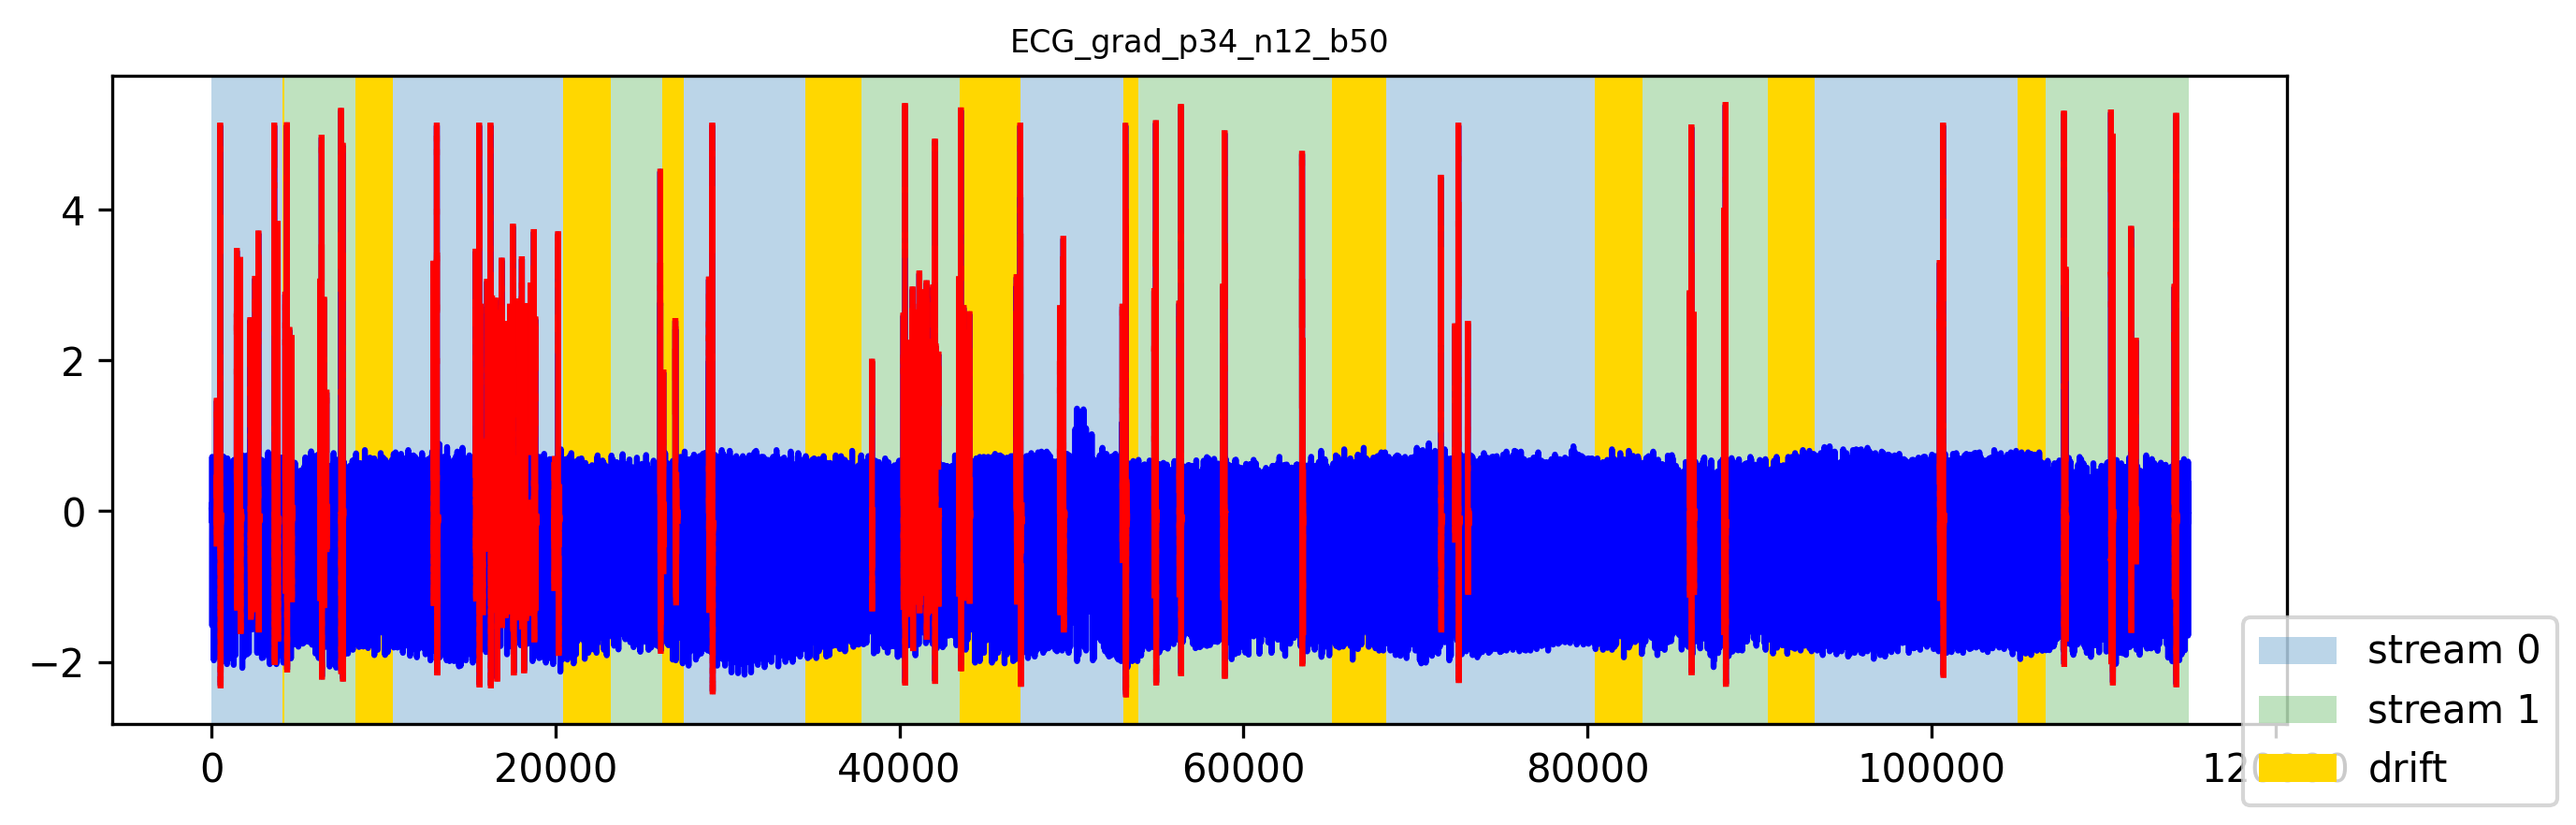

In [10]:
ds.plot_drift()

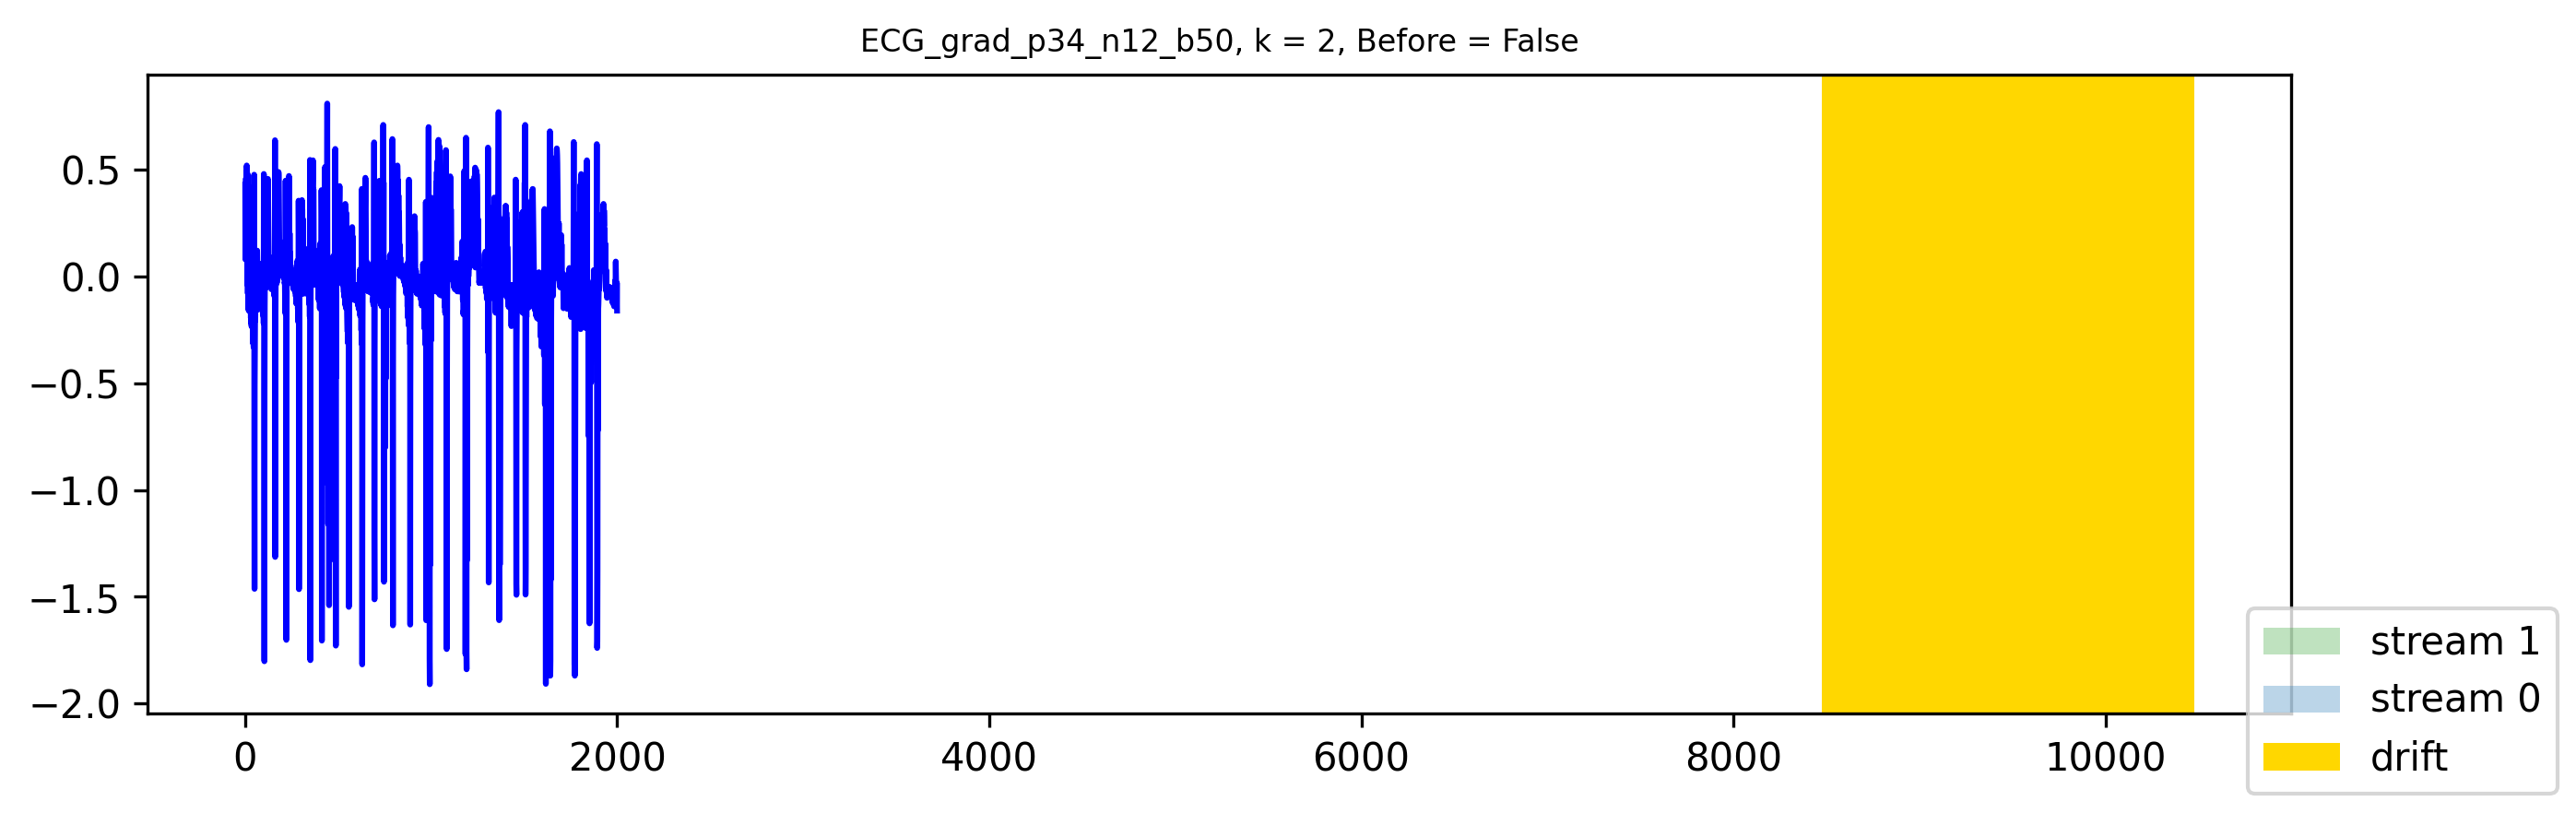

In [11]:
ds.plot_drift_k(k=2,w=1000)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


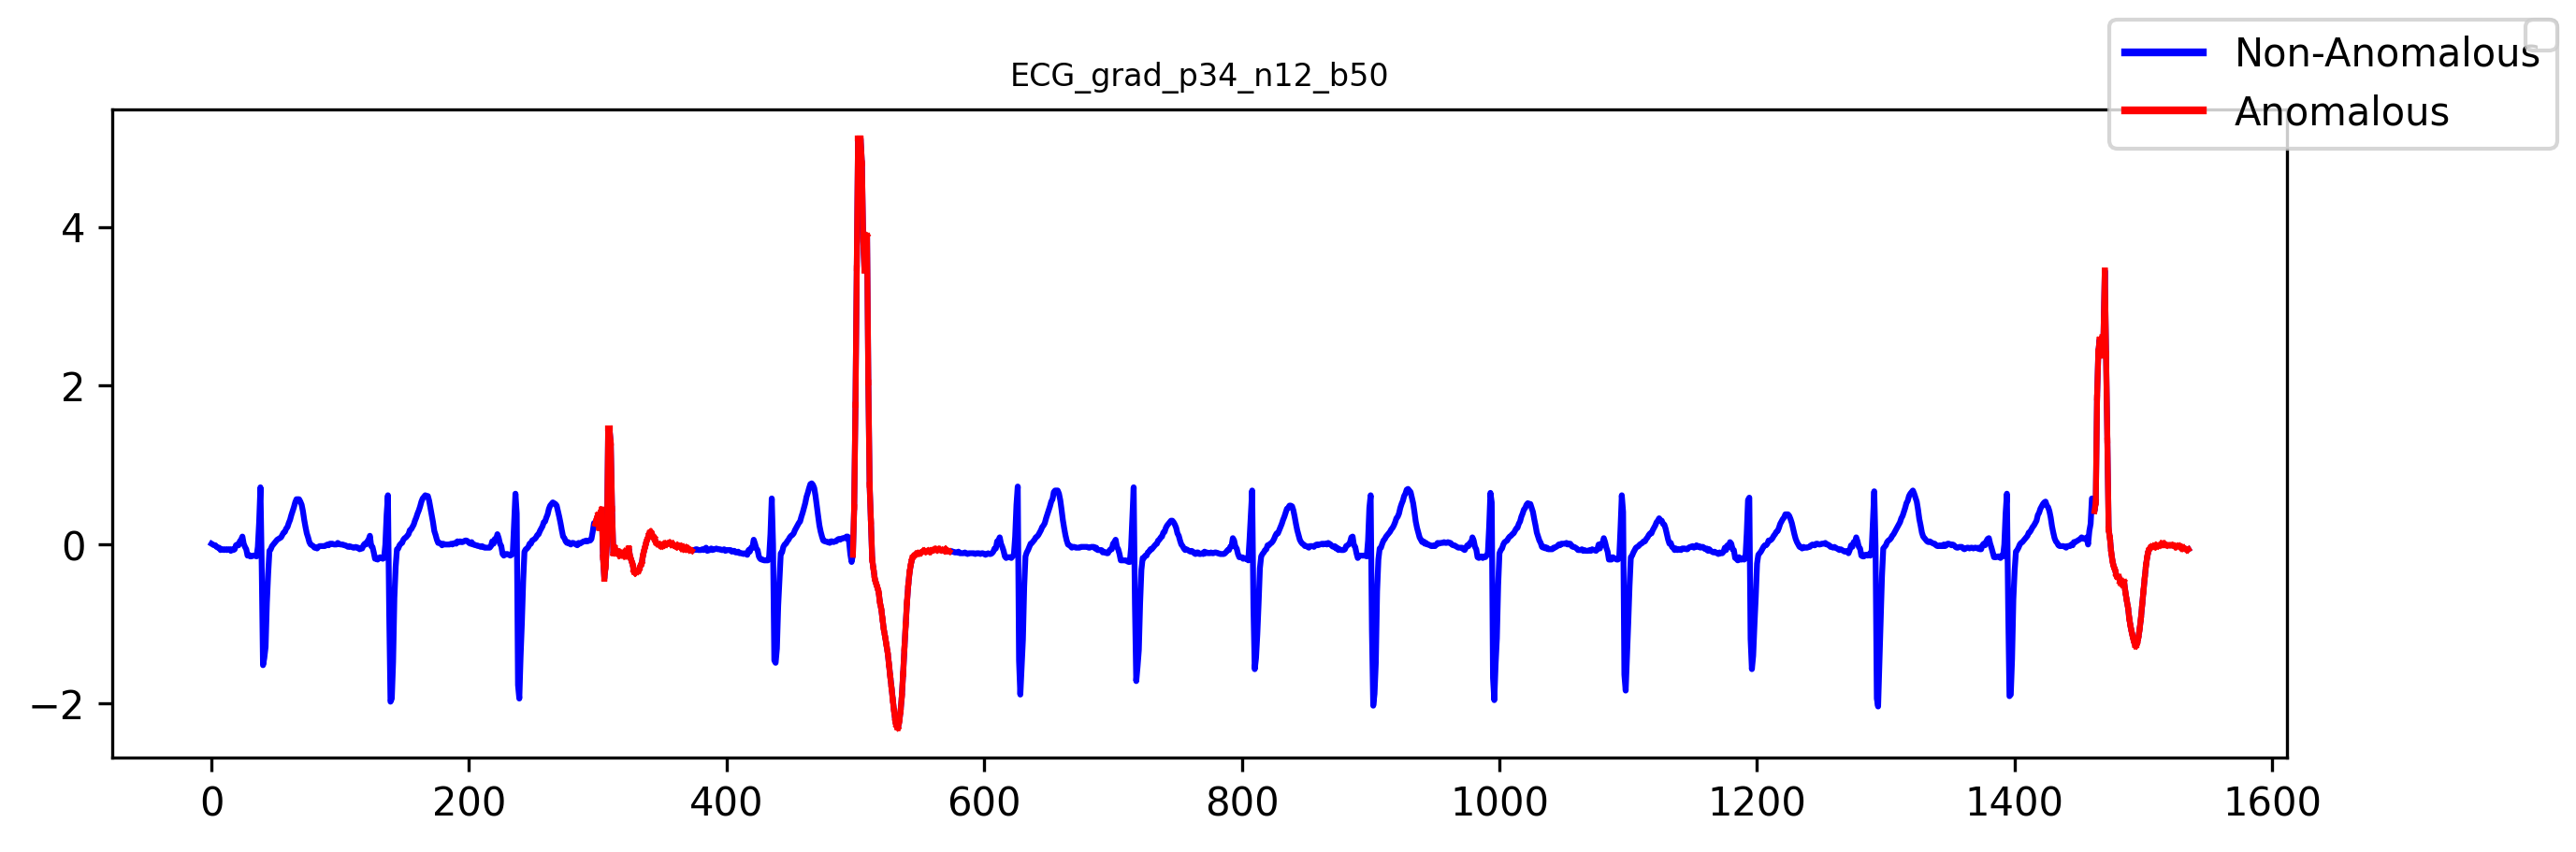

In [12]:
ds.plot_anomaly_k(k=2,w=1000)

In [13]:
ds.source_streams[0].filename

'MBA_ECG14046_data_20'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


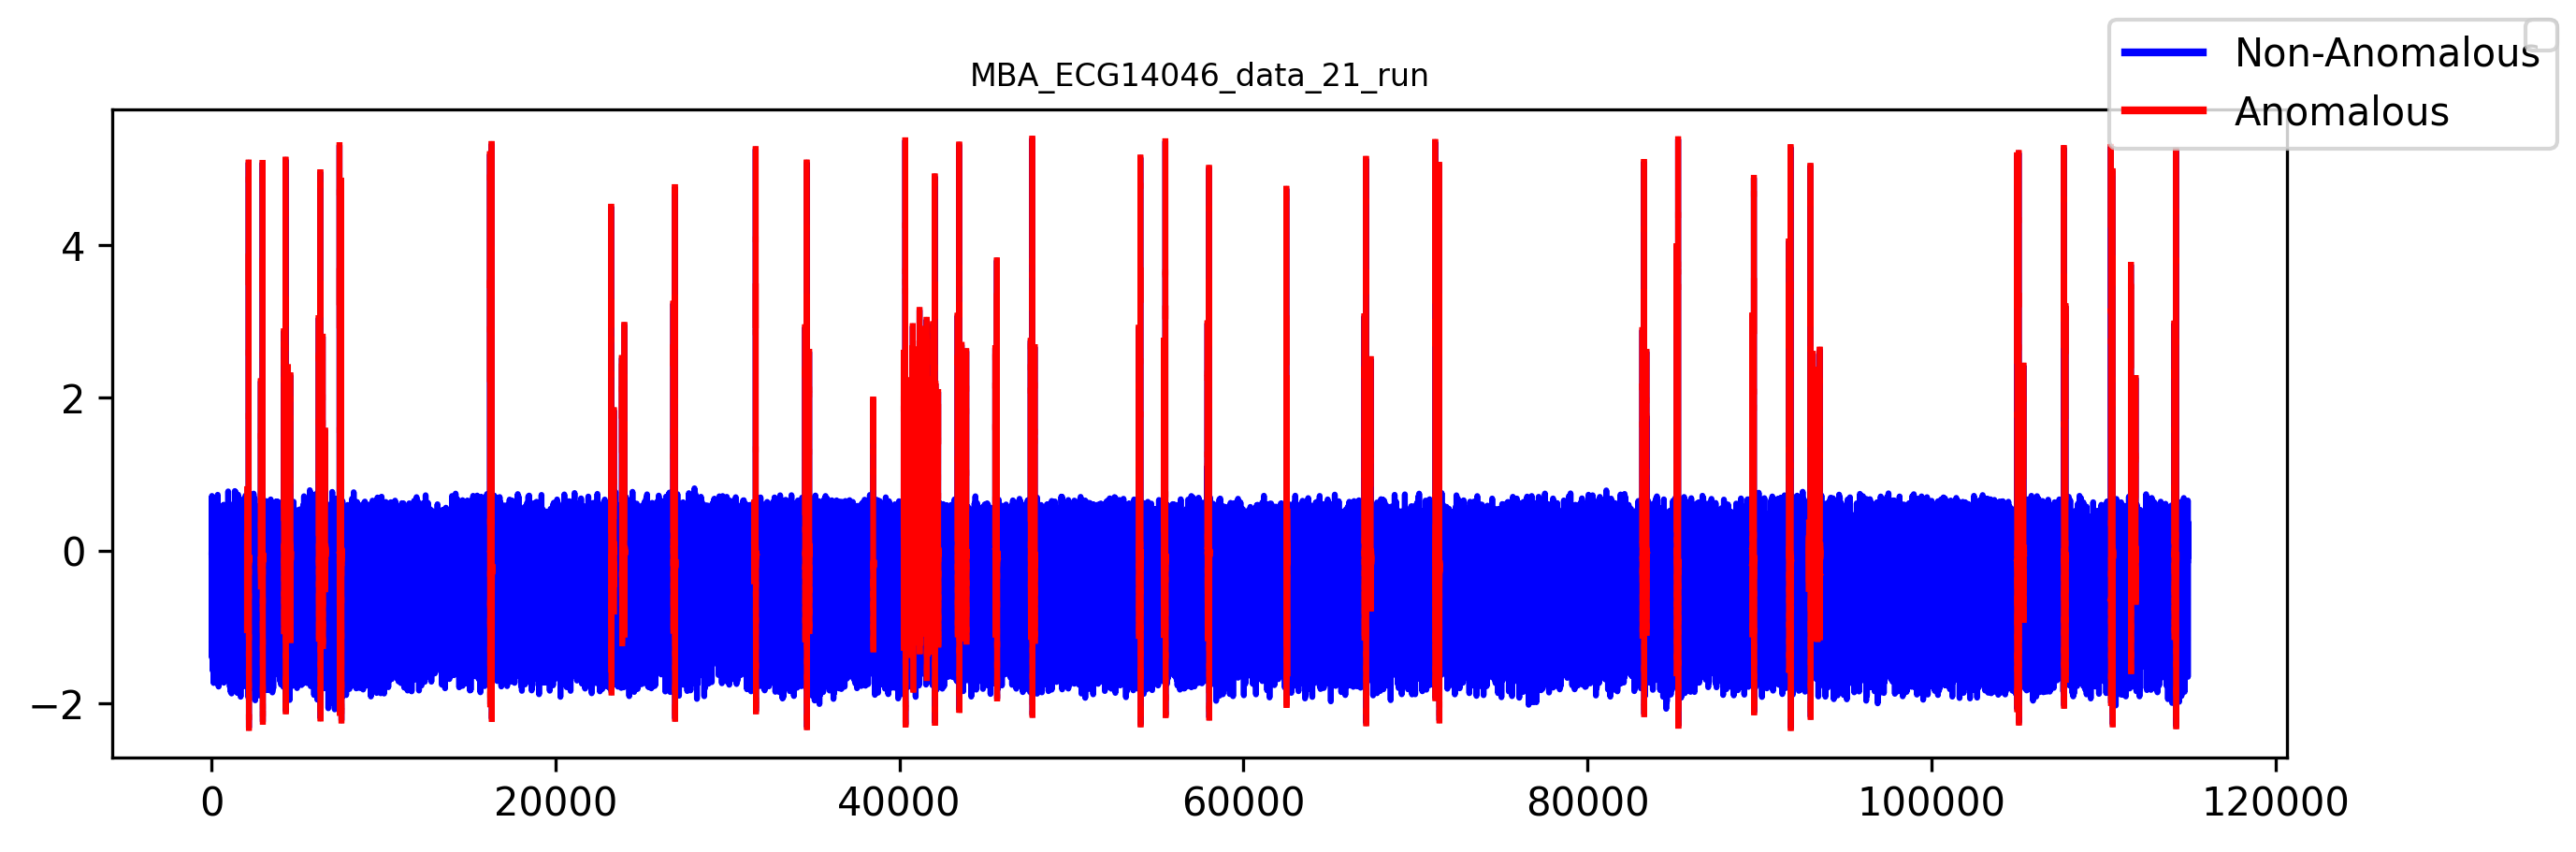

In [14]:
ds.source_streams[1].plot()

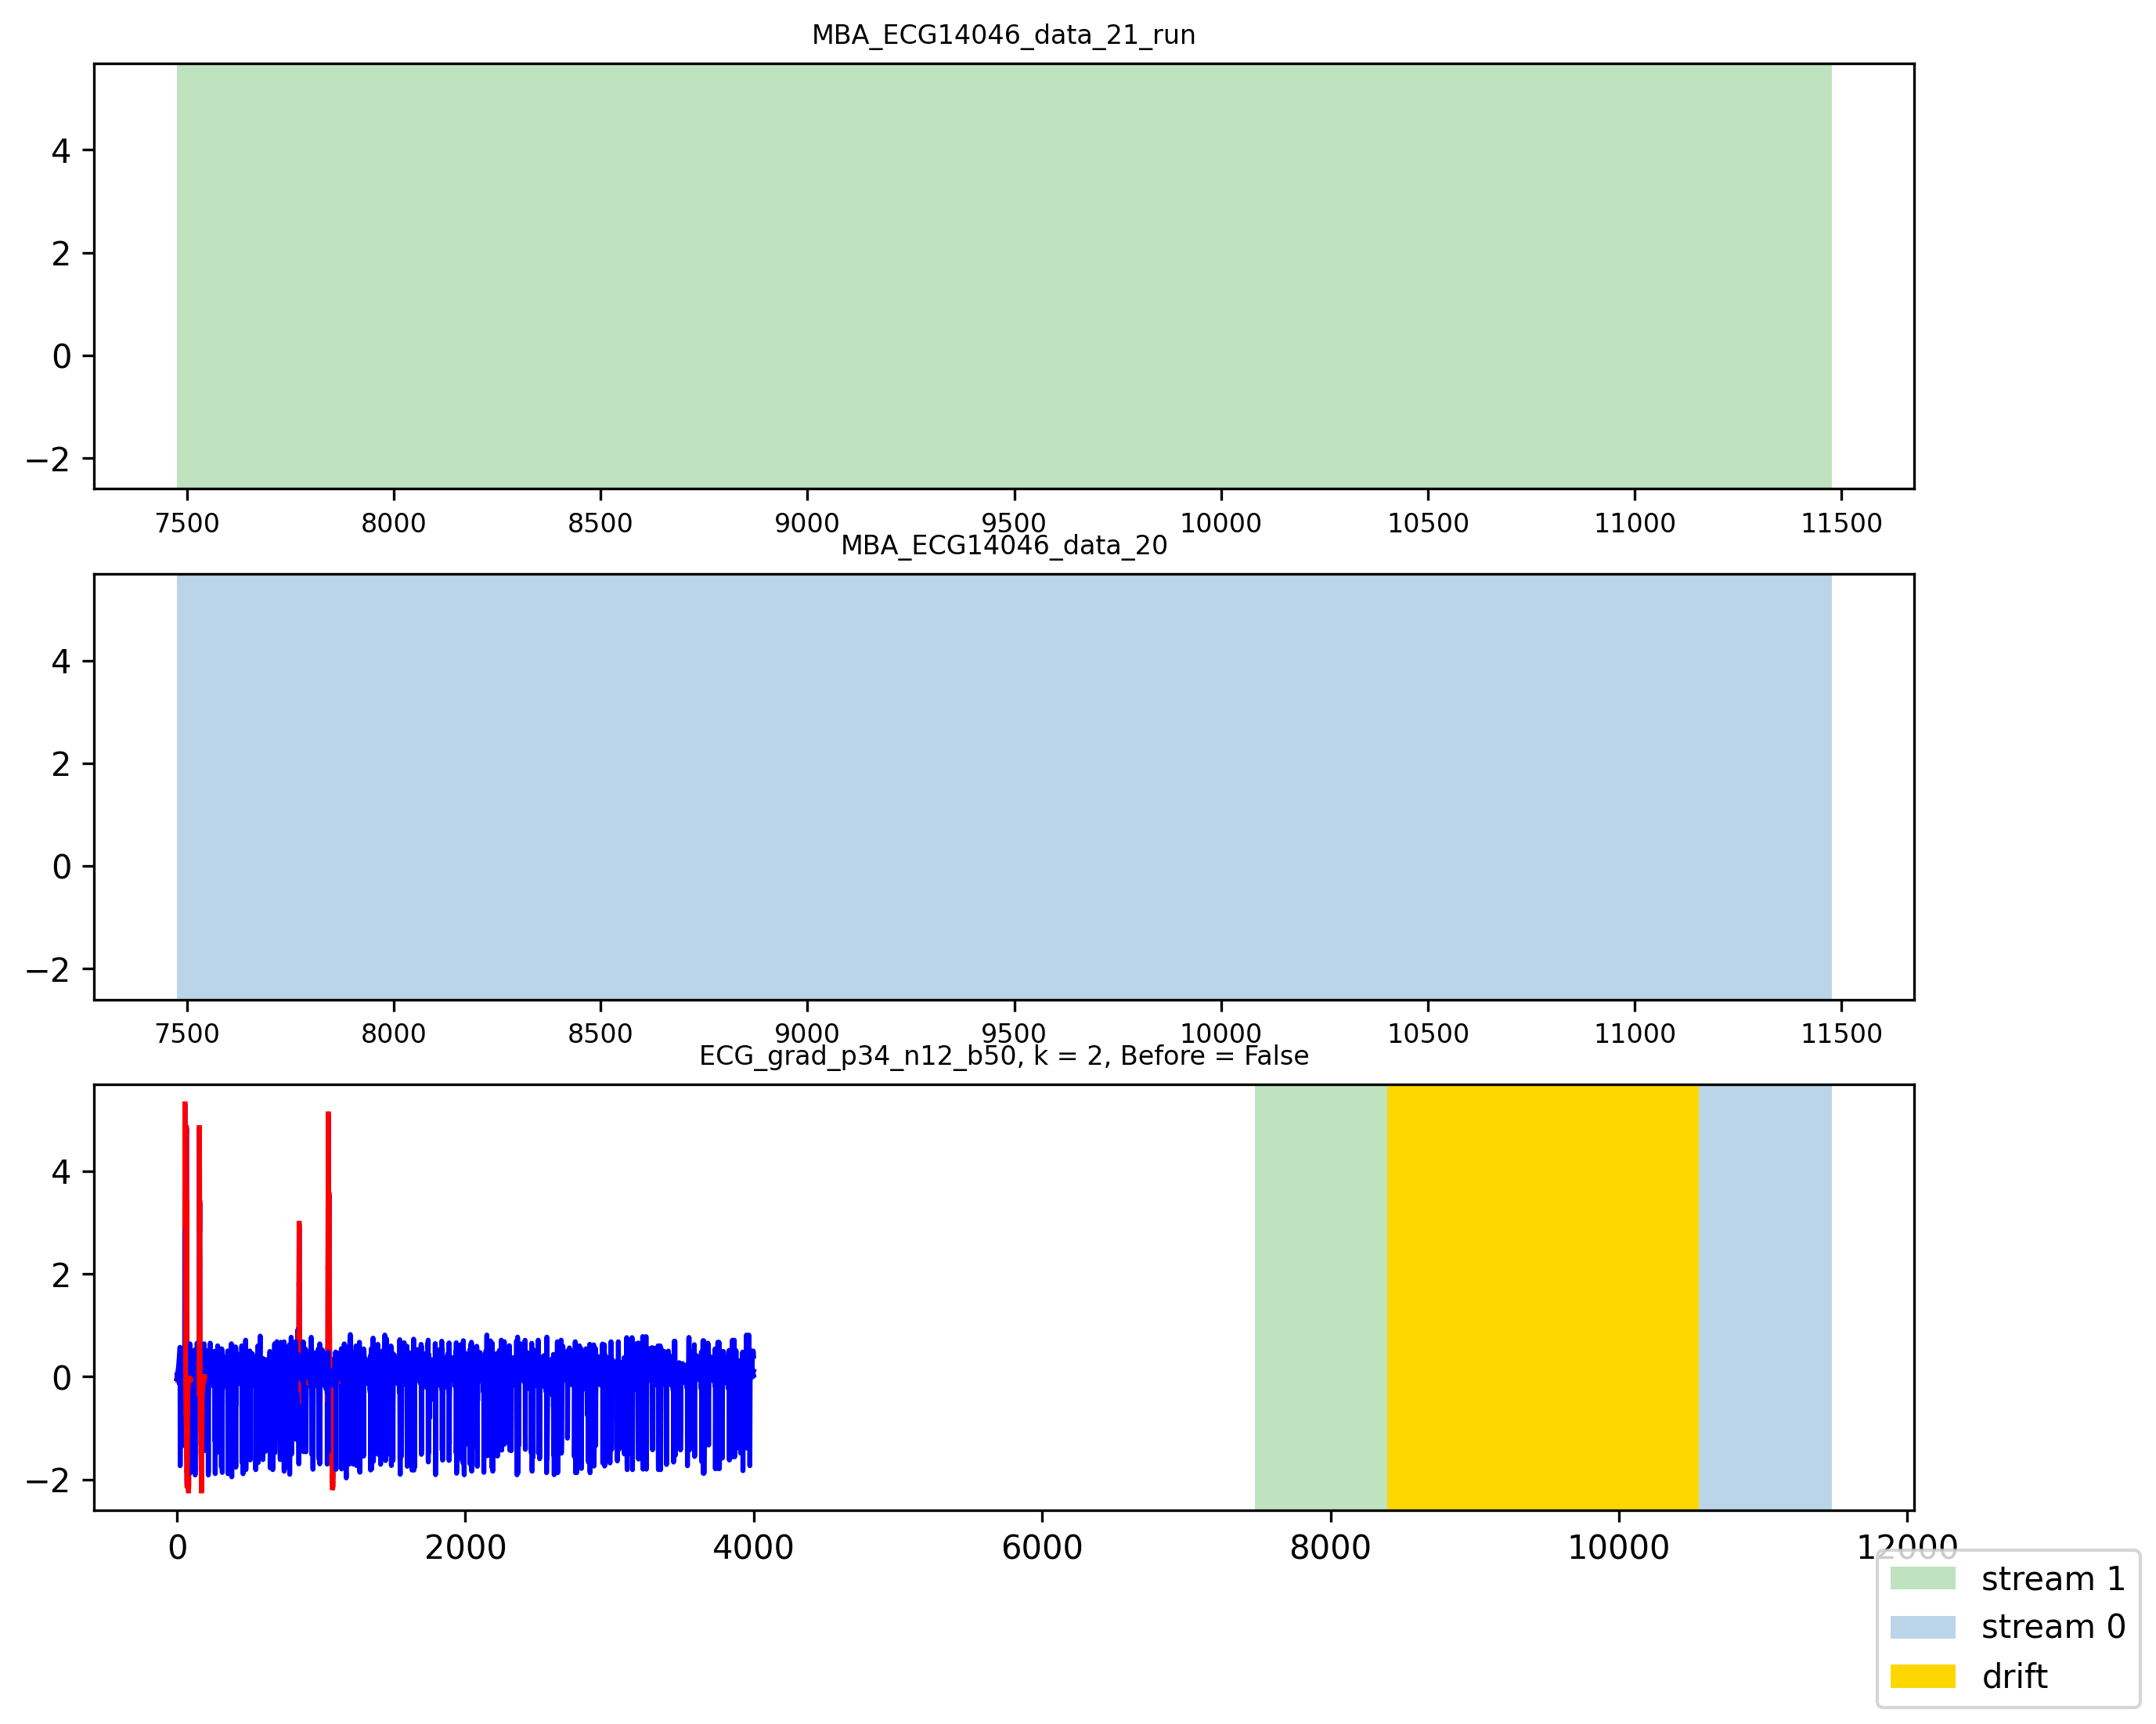

In [15]:
ds.plot_drift_k_with_source(k=2, w=2000)

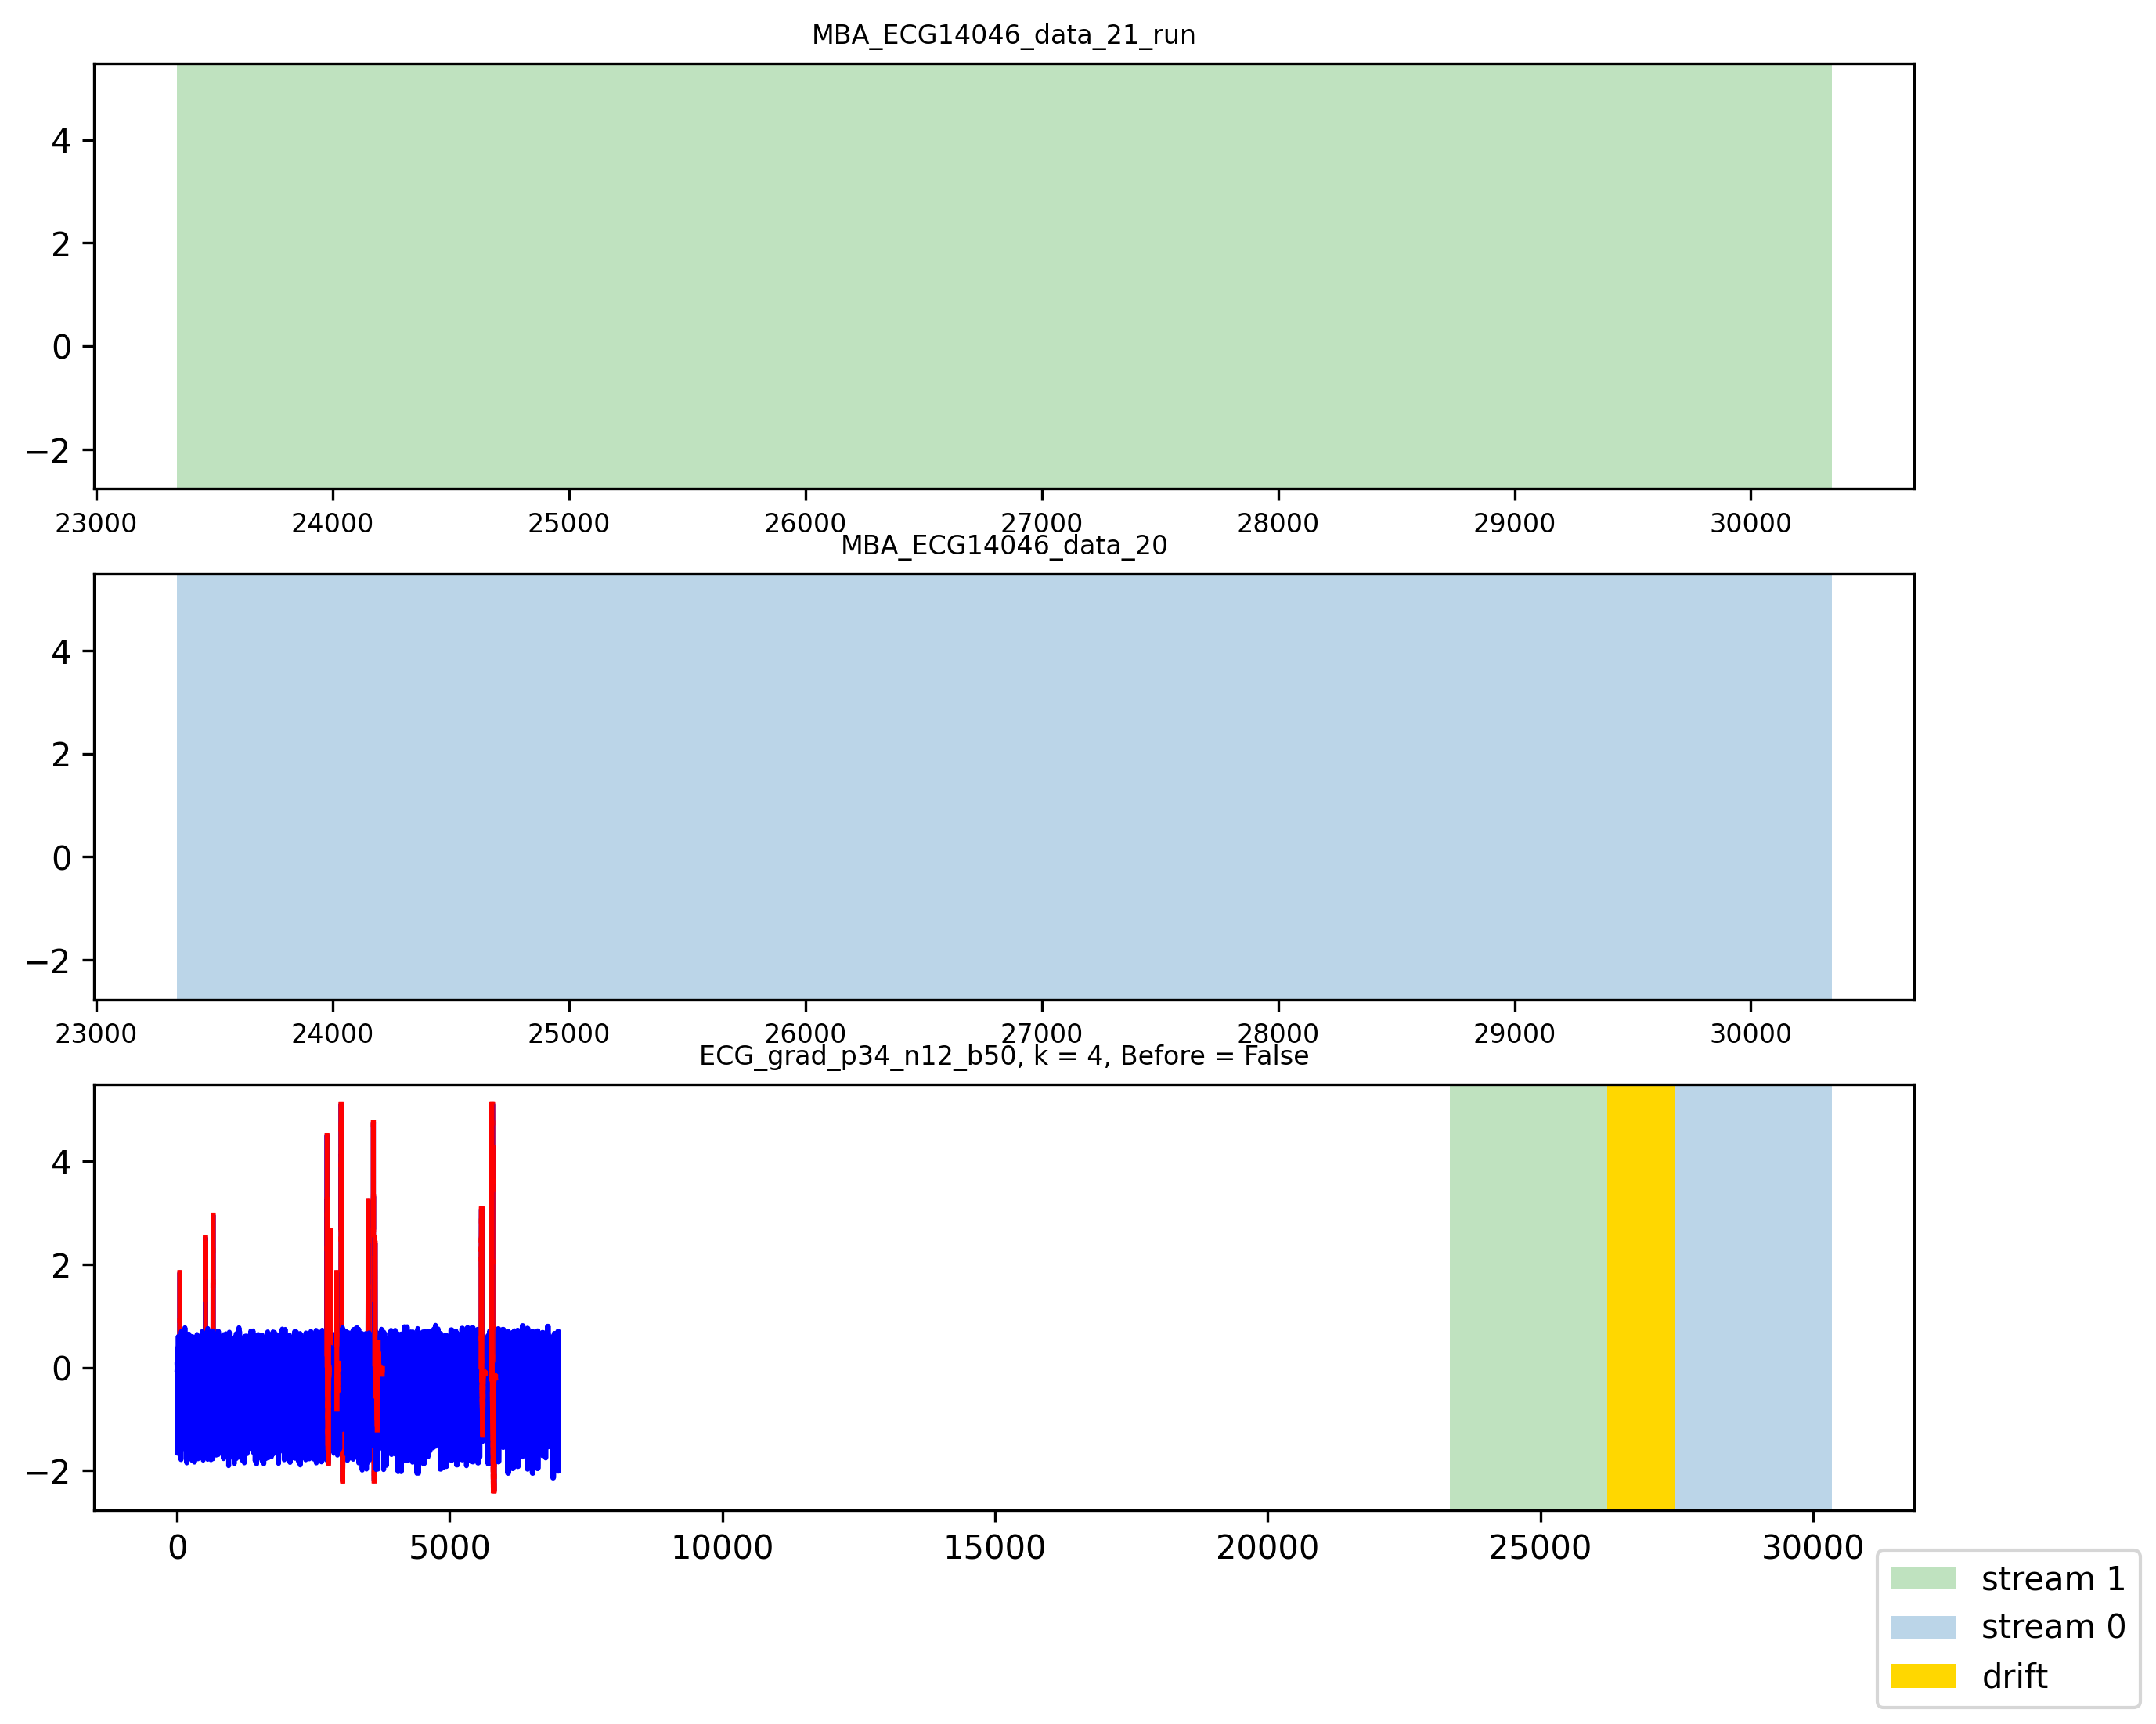

In [16]:
ds.plot_drift_k_with_source(k=4, w=3500)